# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo, comparar tiempos y error a la salida. Probar estrategias de redondeo, saturación y truncamiento.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

In [4]:
%pylab inline
import timeit
import time
import numpy as np

t = np.arange(0,1024/20000.,1/20000.)
    
s1= sin(2*np.pi*1000*t)+1 
s2 = sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)


Populating the interactive namespace from numpy and matplotlib
0.000957012176514
0.00100994110107


La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.

## (1) Funcion media movil.

En el grafico, se utiliza S1 como señal x[n].... y[n]=H(x[n]) ->y[n] resultado de Moving Average

Populating the interactive namespace from numpy and matplotlib


(0, 30)

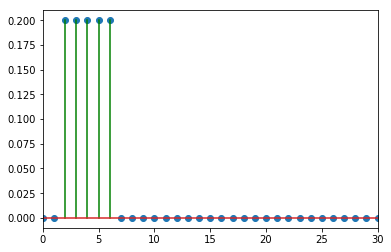

In [5]:
%pylab inline
import matplotlib.pyplot as plt

global M
M=2
global N
N=2
t = np.arange(0,1024/20000.,1/20000.)

dirac = np.zeros(len(t))
dirac[M+N]=1 # defino el valor "1" en una muestra alejada M+N del origen, a fin de poder visualizar correctamente 
            # la transferencia obtenida.


s1= sin(2*np.pi*1000*t)+1 
s1[6]=0  # se introduce ruido, a modo de prueba
s1[7]=0  # se introduce ruido, a modo de prueba
s2 = sin(2*np.pi*1200*t)

############# funcion media movil #############################
def FmedMov(s,M,N):
    a=1./(M+N+1)
    cuenta=0
    Sum=0
    MedMov = np.zeros(len(s))
    for x in range(len(s)):
        for y in range(x-M,x+N+1):
            if y==len(s):
                break
            Sum=Sum+s[y]
        MedMov[x]=a*Sum
        Sum=0
    return MedMov
#######################################################

##################### Transferencia MedMov por convolución ########################

a=1./(N+M+1)

def transferencia(): #defino la variable global hMedMov para que pueda ser accesible desde otra celda
    hMedMov #se trata de un vector que contiene la transferencia de la Media Movil, el vector que
            # contiene los coeficientes de la transferencia depende de los valores de M y N a utilizar.
    return(0)

hMedMov = FmedMov(dirac,M,N) #obtengo la transferencia al utilziar una señal de dirac como entrada a la función.
############################################################

MedPlot = plt.stem(hMedMov,'g')
plt.xlim(0,30)

## (2)Señal cuadrada por MovAvg

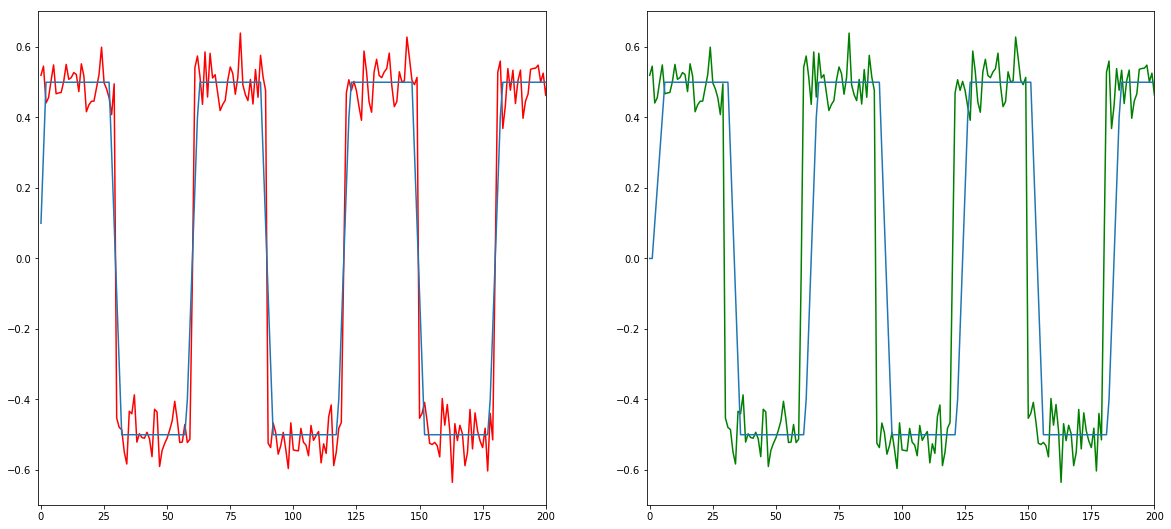

In [6]:
T=500.# duracion del período en us
t = np.arange(0,6*T,T/60.)# 2000 muestras
convolucion = np.zeros(len(t))

c=np.zeros(len(t))
NT=0 # Numero de periodo en la funcion

for x in range(len(t)):
    if t[x] < (NT*T + T/2.):
        c[x]=0.5
    if t[x] >= ((NT+1)*T): 
        NT=NT+1
        continue
    if t[x] >= (NT*T + T/2.):
        c[x]=-0.5

y = FmedMov(c,M,N)

convolucion= np.convolve(c,hMedMov)

noise = np.random.normal(0,0.05,len(t))

for x in range(len(t)):
    c[x]=c[x]+ noise[x]

plt.figure(figsize=(20, 20)) #defino tamaño de la figura

graph1=plt.subplot(2,2,1)
plt.xlim(-1,200)

graph2=plt.subplot(2,2,2)
plt.xlim(-1,200)

graph1.plot(c,'r')
graph1.plot(y)

graph2.plot(c,'g')
graph2.plot(convolucion)


Al realizar la convolucion con la transferencia del Moving Average, el resultado se desfasa N muestras respecto del mismo resultado utilizando la funcion FmedMov(s,M,N), en este ultimo caso sin recurrir a la convolucion.

## (2) Señal triangular por MovAvg

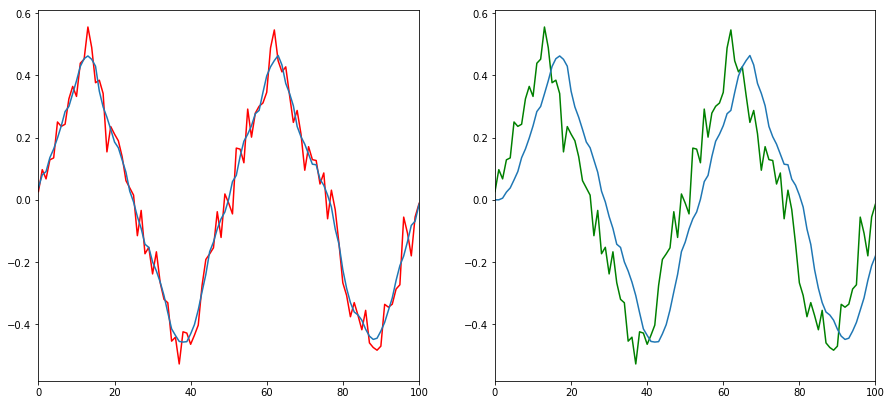

In [7]:
T=1000.# duracion del período en us
t = np.arange(0,4*T,2*T/100.)# 2000 muestras

tr=np.zeros(len(t))
Vp=0.5
p=4*Vp/T

NT=0 # Numero de periodo en la funcion

for x in range(0,len(t)):
    if t[x] < (NT*T + T/4.):
        tr[x]= p*(t[x]-NT*T)
    if t[x] < (NT*T + 3*T/4.) and t[x] >= (NT*T + T/4.):    
        tr[x]= Vp - p*(t[x]-((NT+1/4.)*T))
    if t[x] >= (NT*T + 3*T/4.):
        tr[x]= -Vp + p*(t[x]-((NT+3/4.)*T))
    if t[x] >= ((NT+1)*T): 
        NT=NT+1

noise = np.random.normal(0,0.05,len(t))

for x in range(len(t)):
    tr[x]=tr[x]+ noise[x]
        
y = FmedMov(tr,M,N)

convolucion= np.convolve(tr,hMedMov)

def triangular():
    triang
    return(0)

triang=tr

plt.figure(figsize=(15, 15)) #defino tamaño de la figura
plt.xlim(0,100)
graph1=plt.subplot(2,2,1)
plt.xlim(0,100)

graph2=plt.subplot(2,2,2)
plt.xlim(0,100)

graph1.plot(tr,'r')
graph1.plot(y)

graph2.plot(tr,'g')
graph2.plot(convolucion)

Se concluye que al realizar la convolucion con la transferencia del Moving Average, el vector resultante se atrasa "M" muestras en comparación con el vector resultante al utilizar directamente la funcion FmedMov. ESto se debe a que la transferencia de MovingAvg se encuentra dezplazada M muestras del origen.

('tiempo convolucion -> funcion propia', 0.0023009777069091797)
('tiempo convolucion -> numpy         ', 9.202957153320312e-05)


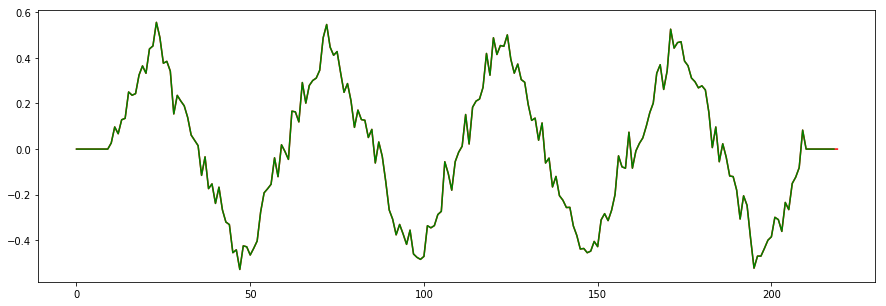

In [40]:
def MAX(x,y):
    if x < y:
        c=y
    else:
        c=x
    return c

def MIN(x,y):
    if x < y:
        c=x
    else:
        c=y
    return c


def Convolucion_code(x,y):
    
    z=np.zeros(len(x)+len(y))
    
    for i in range(len(z)):
        
        # x[n]*y[m]= Σ[k=-∞,k=+∞] {x[k]*y[n-k]}
        
        comienzo = MAX(0,i-len(x)+1) #
        final = MIN(i+1,len(y))   #No se debe exceder el tamaño del vector de muestras de y.
        regresivo = MIN(i,len(x)-1) #de esta forma no excedo el tamaño del vector x -> 
        
        for j in range (comienzo, final):
            z[i] = z[i] + x[regresivo]*y[j]
            regresivo = regresivo - 1
    return z

dirac = np.zeros(20)
dirac[10]=1

start = time.time()
convol=Convolucion_code(triang,dirac)
end = time.time()
print ("tiempo convolucion -> funcion propia",end-start)

start = time.time()
conv_r = np.convolve(triang,dirac)
end = time.time()
print ("tiempo convolucion -> numpy         ",end-start)

plt.figure(figsize=(15, 5)) #defino tamaño de la figura

plt.plot(convol,'r')
plt.plot(conv_r,'g')


Se concluye que la convolucion utilizada mediante la libreria numpy realiza el calculo de forma mas rapida.
Además, en relación a la teoria matematica del Moving Average, se verifica que mientras mayor sea el ancho de la ventana a utilizar, menor contenido de alta frecuencia tendrá la señal original (en el punto (2) se ve que el ruido de alta frecuencia se reduce drasticamente). A su vez se puede deformar la señal original, perdiendo información, si el ancho de la ventana es comparable con la cantidad de muestras que se tiene en un periodo de la señal.